In [1]:
# -*- coding: utf-8 -*-
# @author: tongzi
# @created date: 2019/08/15
# @description: time series (时间序列)
# @last modification: 2019/08/15

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 11.1 Data and Time Data Types and Tools  
The python standard library includes data types for date and time data, as well as calendar-related functionality. The $datatime$, $time$ and $calendar$ modules are the main place to start. The $datetime.datetime$ type, or simply $datetime$, is widely used:


In [3]:
from datetime import datetime

In [4]:
now = datetime.now()

In [5]:
now

datetime.datetime(2019, 8, 19, 9, 7, 20, 204496)

In [6]:
now.year, now.month, now.day

(2019, 8, 19)

$datetime$ stores the date and time down to microsecond, $deltatime$ represents the temporal (暂时的，当前的)difference between two datetime object:

In [7]:
delta = datetime(2019, 8, 15, 9, 42) - datetime(2018, 5, 3, 12, 30)

In [8]:
delta

datetime.timedelta(468, 76320)

In [9]:
delta.days

468

In [10]:
delta.seconds

76320

In [11]:
from datetime import timedelta

In [12]:
start = datetime(2018, 5, 3)

In [13]:
start + timedelta(7) # add 7 days

datetime.datetime(2018, 5, 10, 0, 0)

In [14]:
start - 2 * timedelta(7) # subtract 2 * 7 = 14 days

datetime.datetime(2018, 4, 19, 0, 0)

Table 11-1 summaries the data types in the $datetime$ module. While this chapter is mainly concerned about the data types in pandas and higher-level time series manipulation, we may encounter the datetime-based types in many other places in Python in the wild.  
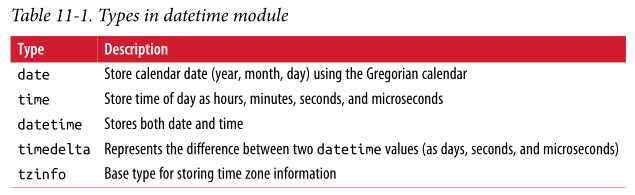

#### Converting Between String and Datetime (字符串与时间的转换)  
We can format datetime objects and pandas Timestamp objects as string using $str()$ or the $strftime()$ (string format time) method, passing the format specification:

In [15]:
stamp = datetime(2019, 8, 15)

In [16]:
str(stamp)

'2019-08-15 00:00:00'

In [17]:
stamp.strftime('%Y-%m-%d')

'2019-08-15'

See Table 11-2 for a complete list of the format codes:  
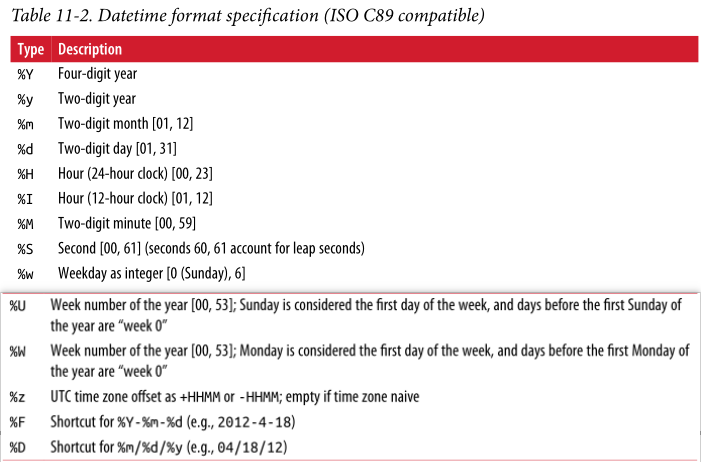

We can also use these same format to convert string to dates using $datetime.strptime()$ (string parse time):

In [18]:
val = "2019/08/15"

In [19]:
datetime.strptime(val, '%Y/%m/%d')

datetime.datetime(2019, 8, 15, 0, 0)

In [20]:
datestrs = ['8/15/2019', '3/5/2018']

In [21]:
[datetime.strptime(date, '%m/%d/%Y') for date in datestrs]

[datetime.datetime(2019, 8, 15, 0, 0), datetime.datetime(2018, 3, 5, 0, 0)]

$datetime.strptime()$ is a good way to parse a date with a known format. However, it can be a bit annoying to have to write a format spec each time, especially for common formats. In this case, we can use the $parser.parse()$ method in the third-party $dateutil$ package:

In [22]:
from dateutil.parser import parse

In [23]:
parse('2019-8-15')

datetime.datetime(2019, 8, 15, 0, 0)

In [24]:
parse('Aug 15, 2019 10:11 AM')

datetime.datetime(2019, 8, 15, 10, 11)

In international locals, day appearing before month is very common, so we pass $dayfirst=True$ to indicate this:

In [25]:
parse('15/8/2019', dayfirst=True)

datetime.datetime(2019, 8, 15, 0, 0)

The $pandas.to\_datetime()$ method parse many different kinds of date representations. Standard date formats like ISO 8601 can be parsed very quickly:

In [26]:
datestrs = ['2019-07-06 12:00:00', '2019-08-15 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2019-07-06 12:00:00', '2019-08-15 00:00:00'], dtype='datetime64[ns]', freq=None)

In [27]:
datestrs + [None]

['2019-07-06 12:00:00', '2019-08-15 00:00:00', None]

It also handles values that should be considered missing (None, empty string, etc.):

In [28]:
pd.to_datetime(datestrs + [None])

DatetimeIndex(['2019-07-06 12:00:00', '2019-08-15 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

**NaT** (Not a Time) is the pandas's null value for timestamp data.

$datetime$ objects also have a number of local-specific formatting options for systems in other countries or languages. For example, the abbreviation month names will be different in German or French systems compared with English systems. See Table 11-3 for a listing:  
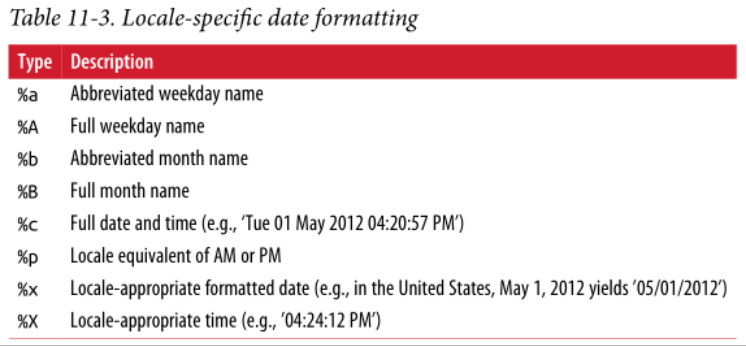

#### 11.3 Time Series Basic  


In [29]:
from datetime import datetime
dates = [datetime(2019, 7, 14), datetime(2019, 7, 18),
        datetime(2019, 8, 14), datetime(2019, 8, 15),
         datetime(2019, 8, 13), datetime(2019, 8, 12)
        ]

In [30]:
ts = pd.Series(np.random.randn(6), index=dates)

In [31]:
ts

2019-07-14   -1.021725
2019-07-18    0.112296
2019-08-14    0.148408
2019-08-15    0.144519
2019-08-13   -0.803674
2019-08-12   -1.067795
dtype: float64

Under the hood, these datetime object is put in a DatatimeIndex:

In [32]:
ts.index

DatetimeIndex(['2019-07-14', '2019-07-18', '2019-08-14', '2019-08-15',
               '2019-08-13', '2019-08-12'],
              dtype='datetime64[ns]', freq=None)

In [33]:
ts[::2]

2019-07-14   -1.021725
2019-08-14    0.148408
2019-08-13   -0.803674
dtype: float64

Like other Series, arthmetic operations between differently indexed time series automatically align on the dates:

In [34]:
ts + ts[::2]

2019-07-14   -2.043450
2019-07-18         NaN
2019-08-12         NaN
2019-08-13   -1.607347
2019-08-14    0.296816
2019-08-15         NaN
dtype: float64

pandas stores timestamp using NumPy's $datetime64$ data type at the nanosecond resoluton:

In [35]:
ts.index.dtype

dtype('<M8[ns]')

In [36]:
stmp = ts.index[0]

In [37]:
stamp

datetime.datetime(2019, 8, 15, 0, 0)

#### Indexing, Selection, Subsetting  
Time series behaves like any pandas.Series objects when we indexing and selecting data based on label:

In [38]:
stamp = ts.index[2]
ts[stamp]

0.14840810663710408

As a convenience, you can also pass a string that is intepretable as a date:

In [39]:
ts['2019/08/15']

2019-08-15    0.144519
dtype: float64

In [40]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2018', periods=1000))

In [41]:
longer_ts

2018-01-01    0.436473
2018-01-02    1.640160
2018-01-03   -0.352686
2018-01-04   -0.414060
2018-01-05   -0.897915
2018-01-06    1.726985
2018-01-07    0.368955
2018-01-08   -0.436830
2018-01-09    0.179357
2018-01-10   -2.373505
2018-01-11   -0.006766
2018-01-12    0.733752
2018-01-13   -0.316636
2018-01-14    0.333672
2018-01-15   -0.503665
2018-01-16    0.207141
2018-01-17    0.236188
2018-01-18   -1.620334
2018-01-19    0.197121
2018-01-20    1.107429
2018-01-21    0.051140
2018-01-22   -1.257538
2018-01-23    0.635322
2018-01-24    1.173287
2018-01-25   -0.312693
2018-01-26   -0.772637
2018-01-27   -0.773257
2018-01-28   -1.184752
2018-01-29    0.052651
2018-01-30   -0.005195
                ...   
2020-08-28    1.125525
2020-08-29    1.282991
2020-08-30   -0.518936
2020-08-31   -1.243557
2020-09-01   -0.070355
2020-09-02    0.723848
2020-09-03   -0.991314
2020-09-04    0.274530
2020-09-05   -0.244774
2020-09-06   -0.872266
2020-09-07   -0.745512
2020-09-08   -1.764345
2020-09-09 

In [42]:
longer_ts['2019'] # 这里2019被解析成年

2019-01-01    1.922769
2019-01-02    0.581071
2019-01-03   -1.447684
2019-01-04    0.265773
2019-01-05   -0.296101
2019-01-06    1.153859
2019-01-07    1.218601
2019-01-08   -0.887578
2019-01-09   -3.272868
2019-01-10    1.032963
2019-01-11    0.891723
2019-01-12   -0.631194
2019-01-13   -0.948559
2019-01-14    0.654853
2019-01-15   -0.026929
2019-01-16   -1.742332
2019-01-17   -0.083938
2019-01-18   -0.883355
2019-01-19   -0.965008
2019-01-20    0.825993
2019-01-21   -0.000002
2019-01-22   -0.986383
2019-01-23   -1.545778
2019-01-24   -1.504032
2019-01-25   -0.516537
2019-01-26    0.610329
2019-01-27   -1.727296
2019-01-28    0.333760
2019-01-29   -0.018650
2019-01-30    0.023698
                ...   
2019-12-02   -0.112547
2019-12-03   -0.627592
2019-12-04   -1.690078
2019-12-05   -0.060283
2019-12-06    0.333098
2019-12-07   -0.258234
2019-12-08   -0.390744
2019-12-09   -1.331548
2019-12-10   -0.569574
2019-12-11    0.124549
2019-12-12    0.358267
2019-12-13   -1.312447
2019-12-14 

Slicing with datetime object works as well:

In [43]:
longer_ts[datetime(2018, 5, 3)]

1.698200622409986

Because most time series data is order chronologically, we can slice with timestamps not contained in a time series to perfrom a range query: 

In [44]:
ts

2019-07-14   -1.021725
2019-07-18    0.112296
2019-08-14    0.148408
2019-08-15    0.144519
2019-08-13   -0.803674
2019-08-12   -1.067795
dtype: float64

In [45]:
ts['2019/07/05':'2019/08/10']

2019-07-14   -1.021725
2019-07-18    0.112296
dtype: float64

As before, we can pass either a string date, datetime, or timestamp. Remember that slicing in this manner produces views on the time series like slicing on NumPy's arrays. **This means that no data is copied and modifications will be reflected in the original data.**  
  
There is an equivalent method, $truncate()$, that slices a Series between two dates:

In [46]:
ts.truncate(after='15/08/2019') # 把2019/08/15之后的数据截断不要

2019-07-14   -1.021725
2019-07-18    0.112296
2019-08-14    0.148408
2019-08-15    0.144519
dtype: float64

In [47]:
ts

2019-07-14   -1.021725
2019-07-18    0.112296
2019-08-14    0.148408
2019-08-15    0.144519
2019-08-13   -0.803674
2019-08-12   -1.067795
dtype: float64

All of this holds true for DataFrame as well, indexing on its rows:

In [48]:
#freq='W-WED'表示取每一个星期的周三作为频率生成日期
dates = pd.date_range('1/1/2018', periods=100, freq='W-WED')

In [49]:
long_df = pd.DataFrame(np.random.randn(100, 5), 
                       columns=['Guangzhou', 'Shenzhen', 'Guilin', 'Nanning', 'Xi\'an'],
                      index=dates)

In [50]:
long_df['2018-5']

,Guangzhou,Shenzhen,Guilin,Nanning,Xi'an
2018-05-02,-1.768560,-0.583469,-0.253098,-0.092791,0.467486
2018-05-09,0.679555,0.383967,0.138232,0.473903,-0.358323
2018-05-16,0.181924,-1.495799,0.808735,0.029334,-0.884451
2018-05-23,1.637981,1.590590,0.531042,-0.068624,0.963283
2018-05-30,0.692911,-1.939411,1.690193,-1.707929,0.553809


#### Time Series with Duplicate Indices  
In some applications, there may be multiple data observations falling on a particular timestamp. Here is an example:

In [51]:
dates = pd.DatetimeIndex(['1/8/2019', '2/8/2019', 
                          '4/8/2019', '5/8/2019', '5/8/2019', '8/8/2019'])

In [52]:
dup_ts = pd.Series(np.arange(6), index=dates)

In [53]:
dup_ts

2019-01-08    0
2019-02-08    1
2019-04-08    2
2019-05-08    3
2019-05-08    4
2019-08-08    5
dtype: int32

We can tell that the index is note unique by checking its $is\_unique$ property:

In [54]:
dup_ts.index.is_unique

False

In [55]:
dup_ts['2/8/2019'] # not duplicated

1

In [56]:
dup_ts['5/8/2019'] # duplicated

2019-05-08    3
2019-05-08    4
dtype: int32

Suppose we want to aggregate the data having non-unique timestamps. One way to do this is to use the $groupby()$ and pass $level=0$:

In [57]:
grouped = dup_ts.groupby(level=0)

In [58]:
grouped.mean()

2019-01-08    0.0
2019-02-08    1.0
2019-04-08    2.0
2019-05-08    3.5
2019-08-08    5.0
dtype: float64

In [59]:
list(grouped)

[(Timestamp('2019-01-08 00:00:00'), 2019-01-08    0
  dtype: int32), (Timestamp('2019-02-08 00:00:00'), 2019-02-08    1
  dtype: int32), (Timestamp('2019-04-08 00:00:00'), 2019-04-08    2
  dtype: int32), (Timestamp('2019-05-08 00:00:00'), 2019-05-08    3
  2019-05-08    4
  dtype: int32), (Timestamp('2019-08-08 00:00:00'), 2019-08-08    5
  dtype: int32)]

In [60]:
grouped.count()

2019-01-08    1
2019-02-08    1
2019-04-08    1
2019-05-08    2
2019-08-08    1
dtype: int64

### 11.3 Date Ranges, Frequencies, and Shifting  
&emsp;&emsp; Generic time series in pandas are assumed to be irregular; that is, they have no fixed frequency. For many applications, this is sufficient. However, it's desirable to work relatively to fixex frequency, such as daily, monthly, or every 15 minutes, even if that means introducing missing values into the time series. pandas has a full suit of standard time series frequencies and tools for resampling, inferring frequencies, and generating fixed -frequency date ranges. For example, we can convert the sample time series to be fixed daily frequency by calling $resample()$:

In [61]:
ts

2019-07-14   -1.021725
2019-07-18    0.112296
2019-08-14    0.148408
2019-08-15    0.144519
2019-08-13   -0.803674
2019-08-12   -1.067795
dtype: float64

In [62]:
resampler = ts.resample('D') # 'D' means daily frequency

In [63]:
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

#### Generating Date Ranges  
$pandas.date\_range()$ is responsible for genereating a DatetimeIndex with an indicated length according to a particular frequency:

In [64]:
index = pd.date_range('2019-7-14', '2019-8-15')

In [65]:
index

DatetimeIndex(['2019-07-14', '2019-07-15', '2019-07-16', '2019-07-17',
               '2019-07-18', '2019-07-19', '2019-07-20', '2019-07-21',
               '2019-07-22', '2019-07-23', '2019-07-24', '2019-07-25',
               '2019-07-26', '2019-07-27', '2019-07-28', '2019-07-29',
               '2019-07-30', '2019-07-31', '2019-08-01', '2019-08-02',
               '2019-08-03', '2019-08-04', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-10',
               '2019-08-11', '2019-08-12', '2019-08-13', '2019-08-14',
               '2019-08-15'],
              dtype='datetime64[ns]', freq='D')

By default, $date\_range()$ generates daily timestamps. If we pass only a start or end date, we must specify the $periods$ argument:

In [66]:
pd.date_range(start='2018-5-3', periods=200)

DatetimeIndex(['2018-05-03', '2018-05-04', '2018-05-05', '2018-05-06',
               '2018-05-07', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-12',
               ...
               '2018-11-09', '2018-11-10', '2018-11-11', '2018-11-12',
               '2018-11-13', '2018-11-14', '2018-11-15', '2018-11-16',
               '2018-11-17', '2018-11-18'],
              dtype='datetime64[ns]', length=200, freq='D')

In [67]:
pd.date_range(end='2019/8/15', periods=50)

DatetimeIndex(['2019-06-27', '2019-06-28', '2019-06-29', '2019-06-30',
               '2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04',
               '2019-07-05', '2019-07-06', '2019-07-07', '2019-07-08',
               '2019-07-09', '2019-07-10', '2019-07-11', '2019-07-12',
               '2019-07-13', '2019-07-14', '2019-07-15', '2019-07-16',
               '2019-07-17', '2019-07-18', '2019-07-19', '2019-07-20',
               '2019-07-21', '2019-07-22', '2019-07-23', '2019-07-24',
               '2019-07-25', '2019-07-26', '2019-07-27', '2019-07-28',
               '2019-07-29', '2019-07-30', '2019-07-31', '2019-08-01',
               '2019-08-02', '2019-08-03', '2019-08-04', '2019-08-05',
               '2019-08-06', '2019-08-07', '2019-08-08', '2019-08-09',
               '2019-08-10', '2019-08-11', '2019-08-12', '2019-08-13',
               '2019-08-14', '2019-08-15'],
              dtype='datetime64[ns]', freq='D')

The start and end dates define strict boundaries for the generated date index. For example, if we wanted a day index only containing the last business day of each month, we would pass $freq='BM'$ frequency and only dates falling or inside the date  interval will be included:

In [68]:
pd.date_range('2018/1/1', '2018/12/1', freq='BM')

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-30', '2018-04-30',
               '2018-05-31', '2018-06-29', '2018-07-31', '2018-08-31',
               '2018-09-28', '2018-10-31', '2018-11-30'],
              dtype='datetime64[ns]', freq='BM')

Table 11-4 list a complete information of frequency:  
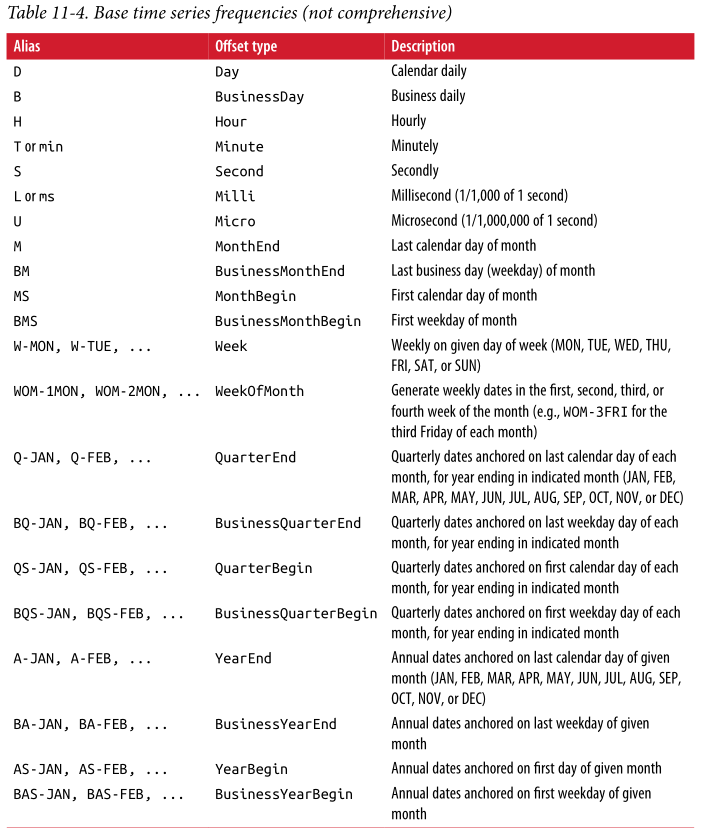

$date\_range()$ by default preserves the time of the start and end timestamp:

In [69]:
pd.date_range('2019/8/15 15:02:36', periods=5)

DatetimeIndex(['2019-08-15 15:02:36', '2019-08-16 15:02:36',
               '2019-08-17 15:02:36', '2019-08-18 15:02:36',
               '2019-08-19 15:02:36'],
              dtype='datetime64[ns]', freq='D')

But sometimes we want to generate a set of timestamps normalized to midnight as a convention,. To do this, there is an option $normalize$:

In [70]:
pd.date_range('2019/8/15 15:02:36', periods=5, normalize=True)

DatetimeIndex(['2019-08-15', '2019-08-16', '2019-08-17', '2019-08-18',
               '2019-08-19'],
              dtype='datetime64[ns]', freq='D')

#### Frequencies and Date Offsets  
Frequencies in pandas are composed of a *base frequency* and multiplier. Base frequencies are typically referred to by a string alias like 'M' for monthly or 'H' for hourly. For each base frequency, there is an object defined generally referred to as a *date offset*. For example, hourly frequency can be represented with the Hour class:

In [71]:
from pandas.tseries.offsets import Hour, Minute

In [72]:
hour = Hour()

In [73]:
hour

<Hour>

In [74]:
five_hour = Hour(5)

In [75]:
five_hour

<5 * Hours>

In many applications, we would never need to explicitly create one of these objects, instead using a string alias like 'H' or '4H'. Putting an integer before the base frequency creates a multiple:

In [76]:
pd.date_range('2019/8/15', '2019/8/15 23:59', freq='3H')

DatetimeIndex(['2019-08-15 00:00:00', '2019-08-15 03:00:00',
               '2019-08-15 06:00:00', '2019-08-15 09:00:00',
               '2019-08-15 12:00:00', '2019-08-15 15:00:00',
               '2019-08-15 18:00:00', '2019-08-15 21:00:00'],
              dtype='datetime64[ns]', freq='3H')

Many offsets can be combined together by addition:

In [77]:
Hour(2) + Minute(45)

<165 * Minutes>

In [78]:
pd.date_range('2018/8/15', periods=15, freq='1h30min')

DatetimeIndex(['2018-08-15 00:00:00', '2018-08-15 01:30:00',
               '2018-08-15 03:00:00', '2018-08-15 04:30:00',
               '2018-08-15 06:00:00', '2018-08-15 07:30:00',
               '2018-08-15 09:00:00', '2018-08-15 10:30:00',
               '2018-08-15 12:00:00', '2018-08-15 13:30:00',
               '2018-08-15 15:00:00', '2018-08-15 16:30:00',
               '2018-08-15 18:00:00', '2018-08-15 19:30:00',
               '2018-08-15 21:00:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates  
One useful frequency class is 'week of month', starting with **WOM**, this enable us to get dates like the third-friday of each month:

In [79]:
# 获取每一个月的第三个周五对应的日期
pd.date_range('2019/1/1', '2019/8/15', freq='WOM-3FRI')

DatetimeIndex(['2019-01-18', '2019-02-15', '2019-03-15', '2019-04-19',
               '2019-05-17', '2019-06-21', '2019-07-19'],
              dtype='datetime64[ns]', freq='WOM-3FRI')


#### Shifting (Leading and Lagging, 超前和滞后) Date  
"Shifting" refers to move date backword and forward through time. Both DataFrame and Series have the $shift()$ method for doing naive shifts forward or backward, leaving the index unmodified:

In [80]:
ts = pd.Series(np.random.randn(5),
              index=pd.date_range('2019/8/1', periods=5))

In [81]:
ts

2019-08-01   -0.160074
2019-08-02   -1.098809
2019-08-03   -0.515814
2019-08-04   -2.432469
2019-08-05   -1.291791
Freq: D, dtype: float64

In [82]:
ts.shift(2) # 参数是正数表示向前移动

2019-08-01         NaN
2019-08-02         NaN
2019-08-03   -0.160074
2019-08-04   -1.098809
2019-08-05   -0.515814
Freq: D, dtype: float64

In [83]:
ts.shift(-2) # 参数是负数表示向后移动

2019-08-01   -0.515814
2019-08-02   -2.432469
2019-08-03   -1.291791
2019-08-04         NaN
2019-08-05         NaN
Freq: D, dtype: float64

In [84]:
ts / ts.shift(1) - 1

2019-08-01         NaN
2019-08-02    5.864370
2019-08-03   -0.530570
2019-08-04    3.715787
2019-08-05   -0.468938
Freq: D, dtype: float64

Because naive shifts leave the index unmodified, some data is discarded. Thus, if the frequency is known, it can be passed to $shift()$ to advance the timestamps instead of simply the data:

In [85]:
# 传入参数freq，日期索引也跟着移动
ts.shift(2, freq='D')

2019-08-03   -0.160074
2019-08-04   -1.098809
2019-08-05   -0.515814
2019-08-06   -2.432469
2019-08-07   -1.291791
Freq: D, dtype: float64

Other frequencies can be passed, too, giving us some flexibility in how to lead or lag the data:

In [86]:
ts.shift(3, freq='D')

2019-08-04   -0.160074
2019-08-05   -1.098809
2019-08-06   -0.515814
2019-08-07   -2.432469
2019-08-08   -1.291791
Freq: D, dtype: float64

In [87]:
ts.shift(1, freq='90T')

2019-08-01 01:30:00   -0.160074
2019-08-02 01:30:00   -1.098809
2019-08-03 01:30:00   -0.515814
2019-08-04 01:30:00   -2.432469
2019-08-05 01:30:00   -1.291791
Freq: D, dtype: float64

The $T$ here stands for minutes.

#### Shifting dates with offset  
The pandas date offsets can also be used with datetime or timestamp objects:

In [88]:
from pandas.tseries.offsets import Day, MonthEnd

In [89]:
now = datetime(2018, 8, 15)

In [90]:
now + 3 * Day()

Timestamp('2018-08-18 00:00:00')

If we add an anchored offset like MonthEnd, the first increment will 'roll forward' a date to the next date according to the frequency rule:

In [91]:
now + MonthEnd()

Timestamp('2018-08-31 00:00:00')

In [92]:
now + MonthEnd(2)

Timestamp('2018-09-30 00:00:00')

Anchored offsets can explicitly roll forward or backward by simply using their $rollforward()$ and $rollback()$ methods, respectively:

In [93]:
offset = MonthEnd()


In [94]:
offset.rollforward(now)

Timestamp('2018-08-31 00:00:00')

In [95]:
offset.rollback(now)

Timestamp('2018-07-31 00:00:00')

A creative use of date offset is to use these method with $groupby()$:

In [96]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [97]:
ts

2000-01-15    0.357185
2000-01-19   -0.958068
2000-01-23   -0.286667
2000-01-27   -1.169555
2000-01-31   -1.867817
2000-02-04   -0.410679
2000-02-08   -0.654542
2000-02-12    0.704725
2000-02-16   -2.134903
2000-02-20   -0.218602
2000-02-24   -0.990143
2000-02-28    0.253659
2000-03-03   -0.147774
2000-03-07    2.237836
2000-03-11    1.117021
2000-03-15    1.674927
2000-03-19    0.892162
2000-03-23   -1.106371
2000-03-27    0.676510
2000-03-31    0.395604
Freq: 4D, dtype: float64

In [98]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.784984
2000-02-29   -0.492926
2000-03-31    0.717489
dtype: float64

Of course, an easier and faster to do this is using $resample()$:

In [99]:
ts.resample('M').mean()

2000-01-31   -0.784984
2000-02-29   -0.492926
2000-03-31    0.717489
Freq: M, dtype: float64

### 11.4 Time Zone Handling  
Working with time zones is generally considered one of the most unpleasant parts of time series manipulation. As a result many timer series users choose to work with timer series at *coordinated universal time* or *UTC*, which is the successor to Greenwich Mean Time and is the international standard. Time zones ares expressed as the offsets from UTC; for example, New York is four hours behind UTC at daylight saving time (夏令时，DST) and five hours behind the rest of the year.  
  
In Python, time zone information comes from the third-party $pytz$ library (installable with pip or conda),  which exposes the *Olson database*, a compilation of world time zone information. This is especially important for historical data because the daylight saving time (DST) transition dates (and even UTC offsets) have been changed numerous time depending on the whims (一时的兴致) of the local governments.  
  
As far as this book is concerned, pandas wrap *pytz*'s functionality so we can ignore its API outside of the time zone names. The time zone names can be found interactively and in the docs:

In [100]:
import pytz

In [101]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [102]:
pytz.common_timezones[:5]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara']

To get a time zone object from *pytz*, use $pytz.timezone()$:

In [103]:
pytz.timezone?

In [104]:
tz = pytz.timezone("America/New_York")

In [105]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

Methods in pandas will accept either time zone or these objects.

#### Time Zone Localization and Conversion  
By default, time series in pandas are *time zone naive*. For example, consider the following time series:

In [106]:
rng = pd.date_range('3/8/2019 8:30', periods=6, freq='D')

In [107]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [108]:
ts

2019-03-08 08:30:00   -1.018456
2019-03-09 08:30:00   -0.356617
2019-03-10 08:30:00    0.939282
2019-03-11 08:30:00    0.199026
2019-03-12 08:30:00    0.377726
2019-03-13 08:30:00   -1.001727
Freq: D, dtype: float64

The index's *tz* is None:

In [109]:
# The index's *tz* is None
print(ts.index.tz)

None


Date ranges can be generated with a time zone set:

In [110]:
pd.date_range('3/8/2019 8:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2019-03-08 08:30:00+00:00', '2019-03-09 08:30:00+00:00',
               '2019-03-10 08:30:00+00:00', '2019-03-11 08:30:00+00:00',
               '2019-03-12 08:30:00+00:00', '2019-03-13 08:30:00+00:00',
               '2019-03-14 08:30:00+00:00', '2019-03-15 08:30:00+00:00',
               '2019-03-16 08:30:00+00:00', '2019-03-17 08:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

Conversion from naive to *localized* is handled by the $tz\_localize()$ method:

In [111]:
ts

2019-03-08 08:30:00   -1.018456
2019-03-09 08:30:00   -0.356617
2019-03-10 08:30:00    0.939282
2019-03-11 08:30:00    0.199026
2019-03-12 08:30:00    0.377726
2019-03-13 08:30:00   -1.001727
Freq: D, dtype: float64

In [112]:
ts_utc = ts.tz_localize('UTC')

In [113]:
ts_utc

2019-03-08 08:30:00+00:00   -1.018456
2019-03-09 08:30:00+00:00   -0.356617
2019-03-10 08:30:00+00:00    0.939282
2019-03-11 08:30:00+00:00    0.199026
2019-03-12 08:30:00+00:00    0.377726
2019-03-13 08:30:00+00:00   -1.001727
Freq: D, dtype: float64

In [114]:
print(ts_utc.index.tz)

UTC


In [115]:
ts_utc.index

DatetimeIndex(['2019-03-08 08:30:00+00:00', '2019-03-09 08:30:00+00:00',
               '2019-03-10 08:30:00+00:00', '2019-03-11 08:30:00+00:00',
               '2019-03-12 08:30:00+00:00', '2019-03-13 08:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

Once a time series has been localized to a particular time zone, it can be converted to another time zone with $tz\_convert()$:

In [116]:
ts_utc.tz_convert('America/New_York')

2019-03-08 03:30:00-05:00   -1.018456
2019-03-09 03:30:00-05:00   -0.356617
2019-03-10 04:30:00-04:00    0.939282
2019-03-11 04:30:00-04:00    0.199026
2019-03-12 04:30:00-04:00    0.377726
2019-03-13 04:30:00-04:00   -1.001727
Freq: D, dtype: float64

In [117]:
ts_eastern = ts.tz_localize('America/New_York')

In [118]:
ts_eastern.tz_convert('UTC')

2019-03-08 13:30:00+00:00   -1.018456
2019-03-09 13:30:00+00:00   -0.356617
2019-03-10 12:30:00+00:00    0.939282
2019-03-11 12:30:00+00:00    0.199026
2019-03-12 12:30:00+00:00    0.377726
2019-03-13 12:30:00+00:00   -1.001727
Freq: D, dtype: float64

In [119]:
ts_eastern.tz_convert('Europe/Berlin')

2019-03-08 14:30:00+01:00   -1.018456
2019-03-09 14:30:00+01:00   -0.356617
2019-03-10 13:30:00+01:00    0.939282
2019-03-11 13:30:00+01:00    0.199026
2019-03-12 13:30:00+01:00    0.377726
2019-03-13 13:30:00+01:00   -1.001727
Freq: D, dtype: float64

$tz\_localize()$ and $tz\_convert()$ are also instance methods on DatetimeIndex:

In [120]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2019-03-08 08:30:00+08:00', '2019-03-09 08:30:00+08:00',
               '2019-03-10 08:30:00+08:00', '2019-03-11 08:30:00+08:00',
               '2019-03-12 08:30:00+08:00', '2019-03-13 08:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

#### Operations with Time Zone --Aware Timestamp objects  
Similar to time series and date ranges, individual Timestamp objects similarly can be localized from naive to time zone-aware and converted from one time zone to another:

In [121]:
stamp = pd.Timestamp('2019-8-16 10:20')

In [122]:
stamp_utc = stamp.tz_localize('UTC')

In [123]:
stamp_utc

Timestamp('2019-08-16 10:20:00+0000', tz='UTC')

In [124]:
stamp_utc.tz_convert('Asia/Shanghai')

Timestamp('2019-08-16 18:20:00+0800', tz='Asia/Shanghai')

We can also pass a time zone when creating a timestamp:

In [125]:
stamp_guangzhou = pd.Timestamp('2019-8-16 10:22', tz='Asia/Shanghai')

In [126]:
stamp_guangzhou

Timestamp('2019-08-16 10:22:00+0800', tz='Asia/Shanghai')

Time zone-aware $Timestamp$ objects internally store a UTC timestamp value nanoseconds since the Unix epoch (January 1, 1970); this UTC value is invariant between time zone conversions:

In [127]:
stamp_utc.value

1565950800000000000

In [128]:
stamp_utc.tz_convert('Europe/Moscow').value

1565950800000000000

#### Operations Between Different Time Zones  
If two time series with different time zones are combined, the result will be UTC. Since the timestamp is stored under the hood in UTC, this is a straightforward operation and requires no conversion to happen:

In [129]:
rng = pd.date_range('16/8/2019 10:35', periods=10, freq='B')

In [130]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [131]:
ts

2019-08-16 10:35:00    0.745823
2019-08-19 10:35:00   -0.658612
2019-08-20 10:35:00   -0.263661
2019-08-21 10:35:00    1.643865
2019-08-22 10:35:00    0.465219
2019-08-23 10:35:00    0.396346
2019-08-26 10:35:00    1.814489
2019-08-27 10:35:00    0.769850
2019-08-28 10:35:00    0.161357
2019-08-29 10:35:00   -0.728288
Freq: B, dtype: float64

In [132]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[3:].tz_convert('Europe/Moscow')

In [133]:
result = ts1 + ts2

In [134]:
result.index

DatetimeIndex(['2019-08-16 09:35:00+00:00', '2019-08-19 09:35:00+00:00',
               '2019-08-20 09:35:00+00:00', '2019-08-21 09:35:00+00:00',
               '2019-08-22 09:35:00+00:00', '2019-08-23 09:35:00+00:00',
               '2019-08-26 09:35:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [135]:
result

2019-08-16 09:35:00+00:00         NaN
2019-08-19 09:35:00+00:00         NaN
2019-08-20 09:35:00+00:00         NaN
2019-08-21 09:35:00+00:00    3.287731
2019-08-22 09:35:00+00:00    0.930437
2019-08-23 09:35:00+00:00    0.792692
2019-08-26 09:35:00+00:00    3.628977
Freq: B, dtype: float64

#### 11.5 Period and Period Arithmetic  
Periods represent timespans, like days, months, quraters, or years. The $Period$ class represents this data type, requring a string or integer and a frequency from Table 11-4:

In [136]:
p = pd.Period(2019, freq='A-DEC')

In [137]:
p

Period('2019', 'A-DEC')

In [138]:
p - 5

Period('2014', 'A-DEC')

In [139]:
p + 2

Period('2021', 'A-DEC')

Regular ranges of periods can be constructed with $period_range()$ function:

In [140]:
rng = pd.period_range('2019-1-1', '2019-8-31', freq='M')

In [141]:
rng

PeriodIndex(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08'],
            dtype='period[M]', freq='M')

The $PeriodIndex$ class stores a sequence of periods and can serve as an index in any pandas data structure:

In [142]:
pd.Series(np.random.randn(len(rng)), index=rng)

2019-01    1.855551
2019-02   -0.188394
2019-03    1.831436
2019-04   -0.375785
2019-05   -1.928757
2019-06   -1.405523
2019-07   -1.472468
2019-08   -0.172569
Freq: M, dtype: float64

If we have an array of strings, we can also use the $PeriodIndex$ class:

In [143]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [144]:
index = pd.PeriodIndex(values, freq='Q-DEC')

In [145]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

#### Period Frequency Conversion  
&emsp;&emsp;$Periods$ and $PeriodIndex$ objects can be converted to another frequency with their $asfreq()$ method. As am example, suppose we have a annual period and wanted to convert it into a monthly period at either the start or end of the year. This is fairly straightforward:

In [146]:
p = pd.Period('2019', freq='A-DEC')

In [147]:
p

Period('2019', 'A-DEC')

In [148]:
p.asfreq('M', how='end')

Period('2019-12', 'M')

In [149]:
p.asfreq('M', how='start')

Period('2019-01', 'M')

We can think of Period('2019', 'A-DEC') as being a sort of cursor pointing to a span of time, subdivided by monthly period. See figure 11-1 for an illustration of this.  
  
For a fiscal year (会计年，财政年) ending on a month other than December, the corresponding monthly subperiods are different:

In [151]:
p = pd.Period('2019', freq='A-Jun')

In [152]:
p

Period('2019', 'A-JUN')

In [153]:
p.asfreq('M', how='start')

Period('2018-07', 'M')

In [154]:
p.asfreq('M', how='end')

Period('2019-06', 'M')

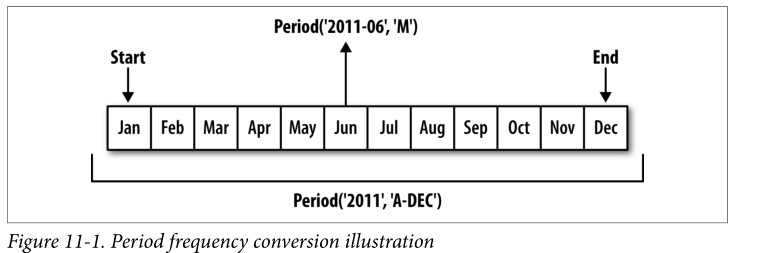

When we are converting from high to low frequency, pandas determins the superperiod depending on where the subperiod "belongs". For example, in $A-JUN$ frequency, the month $Aug-2007$ is actually part of the 2008 period:

In [155]:
p = pd.Period('Aug-2007', 'M')

In [156]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

Whole $PeriodIndex$ objects or time series can be similarly converted with the same semantics(语法):

In [160]:
rng = pd.period_range('2011', '2018', freq='A-DEC')

In [161]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [162]:
ts

2011   -1.100727
2012    2.919240
2013   -1.299654
2014   -0.949504
2015   -0.582054
2016   -1.497590
2017   -1.642173
2018   -0.181490
Freq: A-DEC, dtype: float64

In [163]:
ts.asfreq('M', how='start')

2011-01   -1.100727
2012-01    2.919240
2013-01   -1.299654
2014-01   -0.949504
2015-01   -0.582054
2016-01   -1.497590
2017-01   -1.642173
2018-01   -0.181490
Freq: M, dtype: float64

If we instead wanted the last business day of each year, we can pass the 'B' frequency and indicate that we want the end of the period:

In [165]:
ts.asfreq('B', how='end')

2011-12-30   -1.100727
2012-12-31    2.919240
2013-12-31   -1.299654
2014-12-31   -0.949504
2015-12-31   -0.582054
2016-12-30   -1.497590
2017-12-29   -1.642173
2018-12-31   -0.181490
Freq: B, dtype: float64

#### Quarterly Period Frequency  
&emsp;&emsp; Quarterly data is stored in accounting, finance, and other fields. Much quarterl data is reported relative to *fiscal year end*, typically the last calendar or bueiness day of one of the 12 months of the year. Thus, the period 2019Q4 has different meaning depending on fiscal year end. pandas supports 12 possible quarterly frequencies as Q-JAN  through Q-DEC:

In [166]:
p = pd.Period('2019Q4', freq='Q-JAN')

In [167]:
p

Period('2019Q4', 'Q-JAN')

In the case of fiscal year ending in January, 2014Q4 runs from November through January, which we can check bu converting it to daily frequency. See Figure 11-2 for an illustration:  
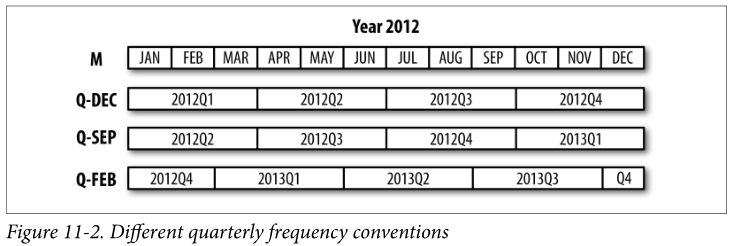

In [169]:
p.asfreq('D', 'start')

Period('2018-11-01', 'D')

In [170]:
p.asfreq('D', 'end')

Period('2019-01-31', 'D')

To get timestamp at 4 PM on the second-to -last business day of the quarter, we can do:

In [171]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [172]:
p4pm

Period('2019-01-30 16:00', 'T')

In [173]:
p4pm.to_timestamp()

Timestamp('2019-01-30 16:00:00')

We can generate quarterly range using $period\_range()$. Arithmetic is identical, too:

In [176]:
rng = pd.period_range('2019Q3', '2020Q4', freq='Q-JAN')

In [177]:
rng

PeriodIndex(['2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4'], dtype='period[Q-JAN]', freq='Q-JAN')

In [178]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [180]:
ts

2019Q3    1.136638
2019Q4   -0.365787
2020Q1   -0.838913
2020Q2    1.100424
2020Q3   -1.163407
2020Q4    1.602471
Freq: Q-JAN, dtype: float64

In [182]:
ts.asfreq('D', how='start')

2018-08-01    1.136638
2018-11-01   -0.365787
2019-02-01   -0.838913
2019-05-01    1.100424
2019-08-01   -1.163407
2019-11-01    1.602471
Freq: D, dtype: float64

In [183]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [184]:
ts.index = new_rng

In [185]:
ts

2018-10-30 16:00    1.136638
2019-01-30 16:00   -0.365787
2019-04-29 16:00   -0.838913
2019-07-30 16:00    1.100424
2019-10-30 16:00   -1.163407
2020-01-30 16:00    1.602471
Freq: T, dtype: float64

#### Converting Timestamps to Periods  
&emsp;&emsp;Series and DataFrame indexed by timestamps can be converted to periods with $to\_period()$ method:

In [186]:
rng = pd.date_range('2018-1-1', periods=16, freq='M')

In [187]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [188]:
ts

2018-01-31    0.236910
2018-02-28    0.846343
2018-03-31    1.456937
2018-04-30   -0.762710
2018-05-31    2.259192
2018-06-30    0.308237
2018-07-31   -1.763260
2018-08-31    0.507662
2018-09-30   -0.542401
2018-10-31    0.233709
2018-11-30   -2.123047
2018-12-31   -0.971671
2019-01-31    0.506296
2019-02-28    0.292208
2019-03-31   -1.015961
2019-04-30    0.802346
Freq: M, dtype: float64

In [189]:
pts = ts.to_period()

In [190]:
pts

2018-01    0.236910
2018-02    0.846343
2018-03    1.456937
2018-04   -0.762710
2018-05    2.259192
2018-06    0.308237
2018-07   -1.763260
2018-08    0.507662
2018-09   -0.542401
2018-10    0.233709
2018-11   -2.123047
2018-12   -0.971671
2019-01    0.506296
2019-02    0.292208
2019-03   -1.015961
2019-04    0.802346
Freq: M, dtype: float64

There is no problem with having duplicate periods in the result:

In [191]:
rng = pd.date_range('8/19/2019', periods=6, freq='D')

In [192]:
ts2 = pd.Series(np.random.randn(len(rng)), index=rng)

In [193]:
ts2

2019-08-19   -0.247138
2019-08-20    0.237179
2019-08-21    0.815809
2019-08-22    0.996224
2019-08-23   -0.392454
2019-08-24   -1.393734
Freq: D, dtype: float64

In [194]:
ts2.to_period('M')

2019-08   -0.247138
2019-08    0.237179
2019-08    0.815809
2019-08    0.996224
2019-08   -0.392454
2019-08   -1.393734
Freq: M, dtype: float64

To convert back to timestamps, use $to\_timestamp()$ method:

In [195]:
pts = ts2.to_period()

In [196]:
pts

2019-08-19   -0.247138
2019-08-20    0.237179
2019-08-21    0.815809
2019-08-22    0.996224
2019-08-23   -0.392454
2019-08-24   -1.393734
Freq: D, dtype: float64

In [197]:
pts.to_timestamp(how='end')

2019-08-19   -0.247138
2019-08-20    0.237179
2019-08-21    0.815809
2019-08-22    0.996224
2019-08-23   -0.392454
2019-08-24   -1.393734
Freq: D, dtype: float64

#### Creating PeriodIndex from Arrays  
&emsp;&emsp;Fixed frequency datasets are sometimes stored with information spread multiple columns. For example, in this macroeconomic dataset, the year and quarter are in different columns:

In [198]:
data = pd.read_csv(r'./examples/macrodata.csv')

In [199]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [202]:
data.year[:5]

0    1959
1    1959
2    1959
3    1959
4    1960
Name: year, dtype: int64

In [203]:
data.quarter[:5]

0    1
1    2
2    3
3    4
4    1
Name: quarter, dtype: int64

By passing these arrays to $PeriodIndex$ with a fequency, we can combine them to form an index for the DataFrame:

In [204]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')

In [205]:
data.index = index

In [206]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

### 11.6 Resampling and Frequency Conversion  
*Resampling* refers to the process of converting a time series from one frequency to another. Aggregating higher frequency data to lower frequency is called *downsampling*, while converting lower frequency to higher frequency is called *upsampling*. Not all resampling falls into these categories.  
  
pandas objects are equiped with $resample()$ method, which is the workhorse function for all frequency conversion. $resample()$ has a similar API to $groupby()$; we could call $resample()$ to group the data, then call an aggregation function:

In [214]:
rng = pd.date_range('2011-1-1', periods=100, freq='D')

In [215]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [216]:
ts[:10]

2011-01-01    1.507157
2011-01-02   -0.106760
2011-01-03   -0.861400
2011-01-04   -0.333322
2011-01-05   -0.987368
2011-01-06   -0.508391
2011-01-07   -0.015514
2011-01-08    1.200501
2011-01-09   -0.752840
2011-01-10    1.070207
Freq: D, dtype: float64

In [217]:
ts.resample('M').mean()

2011-01-31    0.005077
2011-02-28    0.325886
2011-03-31   -0.143666
2011-04-30   -0.002411
Freq: M, dtype: float64

In [218]:
ts.resample('M', kind='period').mean()

2011-01    0.005077
2011-02    0.325886
2011-03   -0.143666
2011-04   -0.002411
Freq: M, dtype: float64

Table 11-5 summaries some of its options:  
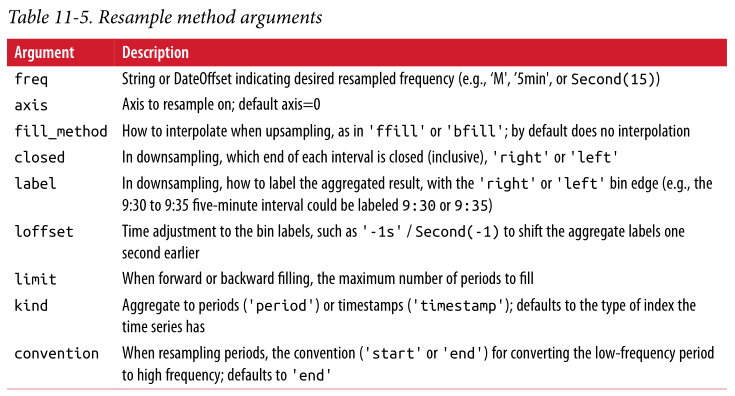

#### Downresampling  
&emsp;&emsp;Aggregating data to regular, lower frequency is a pretty normal time series task. The data we're aggregating doesn't need to be fixed frequently; the desired frequency difines *bin edges* that are used to slice the time series into pieces to aggregate.  
  
There are a couple of things to think about when using $resample()$ to downsample data:  
(1)Whici side of interval is closed;  
(2)How to label each aggregated bin, either at the start of the interval or the end.

In [219]:
rng = pd.date_range('2011-9-1', periods=12, freq='T')

In [220]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [221]:
ts

2011-09-01 00:00:00    1.054862
2011-09-01 00:01:00    1.164731
2011-09-01 00:02:00    1.255944
2011-09-01 00:03:00    1.001060
2011-09-01 00:04:00   -0.005387
2011-09-01 00:05:00   -0.223397
2011-09-01 00:06:00   -1.230851
2011-09-01 00:07:00    2.775994
2011-09-01 00:08:00    1.448943
2011-09-01 00:09:00   -0.268307
2011-09-01 00:10:00   -0.002702
2011-09-01 00:11:00    1.537622
Freq: T, dtype: float64

Suppose we want to aggregate this data into five-minut chunks or bars by taking the sum of each group:  

In [222]:
ts.resample('5min', closed='right').sum()

2011-08-31 23:55:00    1.054862
2011-09-01 00:00:00    3.192951
2011-09-01 00:05:00    2.723076
2011-09-01 00:10:00    1.537622
Freq: 5T, dtype: float64

Passing *closed='right'* changes the interval to be closed on the right. The resulting time series is labeled by the timestamps from the left side of each bin, by passing *label='right'*  we can label them with the right bin edge:

In [224]:
ts.resample('5min', closed='right', label='right').sum()

2011-09-01 00:00:00    1.054862
2011-09-01 00:05:00    3.192951
2011-09-01 00:10:00    2.723076
2011-09-01 00:15:00    1.537622
Freq: 5T, dtype: float64

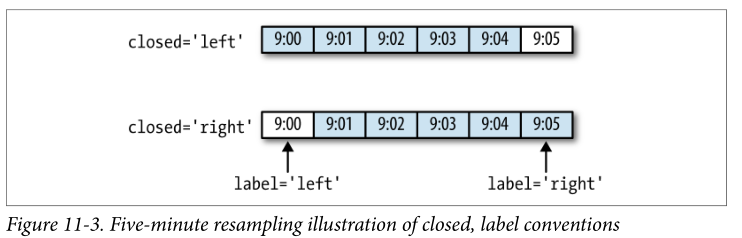

Lastly, we may want shift the result index by some amount, say subtracting one second from the right edge to make it more clear that which interval the timestamp refers to. To do this, pass a string or date offset to $loffset$:

In [225]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

2011-08-31 23:59:59    1.054862
2011-09-01 00:04:59    3.192951
2011-09-01 00:09:59    2.723076
2011-09-01 00:14:59    1.537622
Freq: 5T, dtype: float64

We could also have accomplished the effect of ***loffset*** by calling the $shift()$ method on the result without the ***loffset***:

In [243]:
ts.resample('5min', closed='right', label='right').sum().shift(-1, freq='S')

2011-08-31 23:59:59    1.054862
2011-09-01 00:04:59    3.192951
2011-09-01 00:09:59    2.723076
2011-09-01 00:14:59    1.537622
Freq: 5T, dtype: float64

##### Open-High-Low-Close (OHLC) resampling  
In finance, a popular way to aggregate a time series is to compute four values for each bucket; the first (open), the last (close), the maximal (high), and the minimal (low).  By using the ***olhc***() aggregate function we will obtain a DataFrame having columns containing these four aggregates, which are efficently computed in a single sweep of the data:

In [244]:
ts.resample('5min').ohlc()

,open,high,low,close
2011-09-01 00:00:00,1.054862,1.255944,-0.005387,-0.005387
2011-09-01 00:05:00,-0.223397,2.775994,-1.230851,-0.268307
2011-09-01 00:10:00,-0.002702,1.537622,-0.002702,1.537622


#### Upsampling and Interpolation  
When converting from a lower frequency to a higher frequency, no aggregation is needed. Let's consider a DataFrame with some weekly data:  

In [250]:
frame = pd.DataFrame(np.random.randn(3, 4), 
                     index=pd.date_range('19/8/2019', periods=3, freq='W-WED'),
                    columns=['Guangzhou', 'Nanning', 'Guilin', 'Liuzhou'])

In [251]:
frame

,Guangzhou,Nanning,Guilin,Liuzhou
2019-08-21,-0.351512,-0.637260,1.787887,1.538177
2019-08-28,2.095838,0.479902,1.047859,0.340657
2019-09-04,-1.249096,0.039936,0.282816,-0.767932


In [252]:
df_daily = frame.resample('D').asfreq()

In [253]:
df_daily

,Guangzhou,Nanning,Guilin,Liuzhou
2019-08-21,-0.351512,-0.637260,1.787887,1.538177
2019-08-22,NaN,NaN,NaN,NaN
2019-08-23,NaN,NaN,NaN,NaN
2019-08-24,NaN,NaN,NaN,NaN
2019-08-25,NaN,NaN,NaN,NaN
2019-08-26,NaN,NaN,NaN,NaN
2019-08-27,NaN,NaN,NaN,NaN
2019-08-28,2.095838,0.479902,1.047859,0.340657
2019-08-29,NaN,NaN,NaN,NaN
2019-08-30,NaN,NaN,NaN,NaN


In [254]:
frame.resample('D').ffill()

,Guangzhou,Nanning,Guilin,Liuzhou
2019-08-21,-0.351512,-0.637260,1.787887,1.538177
2019-08-22,-0.351512,-0.637260,1.787887,1.538177
2019-08-23,-0.351512,-0.637260,1.787887,1.538177
2019-08-24,-0.351512,-0.637260,1.787887,1.538177
2019-08-25,-0.351512,-0.637260,1.787887,1.538177
2019-08-26,-0.351512,-0.637260,1.787887,1.538177
2019-08-27,-0.351512,-0.637260,1.787887,1.538177
2019-08-28,2.095838,0.479902,1.047859,0.340657
2019-08-29,2.095838,0.479902,1.047859,0.340657
2019-08-30,2.095838,0.479902,1.047859,0.340657


We can similarly choose to only fill a certain number of periods forward to limit how far to continue using an observed value:

In [255]:
frame.resample('D').ffill(limit=2)

,Guangzhou,Nanning,Guilin,Liuzhou
2019-08-21,-0.351512,-0.637260,1.787887,1.538177
2019-08-22,-0.351512,-0.637260,1.787887,1.538177
2019-08-23,-0.351512,-0.637260,1.787887,1.538177
2019-08-24,NaN,NaN,NaN,NaN
2019-08-25,NaN,NaN,NaN,NaN
2019-08-26,NaN,NaN,NaN,NaN
2019-08-27,NaN,NaN,NaN,NaN
2019-08-28,2.095838,0.479902,1.047859,0.340657
2019-08-29,2.095838,0.479902,1.047859,0.340657
2019-08-30,2.095838,0.479902,1.047859,0.340657


In [256]:
frame.resample('W-THU').ffill()

,Guangzhou,Nanning,Guilin,Liuzhou
2019-08-22,-0.351512,-0.637260,1.787887,1.538177
2019-08-29,2.095838,0.479902,1.047859,0.340657
2019-09-05,-1.249096,0.039936,0.282816,-0.767932


#### Resampling with Periods  
Resampling data indexed by periods is similar to timestamps:


In [258]:
fr = pd.DataFrame(np.random.randn(24, 4), 
                  index=pd.period_range('1-2018', '12-2019', freq='M'),
                 columns=['Guangzhou', 'Nanning', 'Guilin', 'Liuzhou'])

In [259]:
fr

,Guangzhou,Nanning,Guilin,Liuzhou
2018-01,-2.100431,0.175612,0.066921,-0.346670
2018-02,-0.971335,-0.683309,0.984039,0.697177
2018-03,-0.638484,-0.633827,0.682673,-0.738861
2018-04,-0.396026,0.936293,-0.194285,-0.897865
2018-05,-0.553966,-0.226618,-0.089420,0.430325
2018-06,0.723336,-0.070084,0.349316,-0.041852
2018-07,-1.083379,0.227661,0.456990,-0.717472
2018-08,1.859663,-1.324527,1.891984,-0.492304
2018-09,-1.786854,-0.344749,1.788987,0.600602
2018-10,0.696590,-0.336651,0.769578,-0.254423


In [260]:
annual_frame = fr.resample('A-DEC').mean()

In [261]:
annual_frame

,Guangzhou,Nanning,Guilin,Liuzhou
2018,-0.315324,-0.170869,0.574703,-0.277704
2019,-0.398354,-0.053566,-0.118655,0.375037


Upsampling is more nuanced, as we must make a decision about which end of the timespan in the new frequency to place the values before resampling, just like the $asfreq()$ method. The ***convention*** argument defaults to 'start' but can be 'end':

In [264]:
# Q-DEC: quarterly, year ending in December
annual_frame.resample('Q-DEC', convention='end').ffill()

,Guangzhou,Nanning,Guilin,Liuzhou
2018Q4,-0.315324,-0.170869,0.574703,-0.277704
2019Q1,-0.315324,-0.170869,0.574703,-0.277704
2019Q2,-0.315324,-0.170869,0.574703,-0.277704
2019Q3,-0.315324,-0.170869,0.574703,-0.277704
2019Q4,-0.398354,-0.053566,-0.118655,0.375037


Since periods refer to timespans the rules about downsampling and upsampling are more rigid:  
(1) In downsampling, the target frequency must be a *subperiod* of the source frequency;  
(2) In upsampling, the target frequency must be a *superperiod* of the source frequency.

In [265]:
annual_frame.resample('Q-MAR').ffill()

,Guangzhou,Nanning,Guilin,Liuzhou
2018Q4,-0.315324,-0.170869,0.574703,-0.277704
2019Q1,-0.315324,-0.170869,0.574703,-0.277704
2019Q2,-0.315324,-0.170869,0.574703,-0.277704
2019Q3,-0.315324,-0.170869,0.574703,-0.277704
2019Q4,-0.398354,-0.053566,-0.118655,0.375037
2020Q1,-0.398354,-0.053566,-0.118655,0.375037
2020Q2,-0.398354,-0.053566,-0.118655,0.375037
2020Q3,-0.398354,-0.053566,-0.118655,0.375037


### 11.7 Moving Window Functions  
&emsp;&emsp;An important class of array transformations used for time series operations are statistics and other functions evaluated over a slicing window or with exponentially decaying wights. This can be useful for smoothing noisy or gappy data. Like other statistical functions, these also automatically exclude missing data.  
  
Before digging in, we can load up some time series data and resample ti to business day frequency:

In [266]:
close_px_all = pd.read_csv('./examples/stock_px_2.csv', 
                           parse_dates=True, index_col=0)

In [267]:
close_px_all[:3]

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01


In [268]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM', 'SPX']]

In [269]:
close_px = close_px.resample('B').ffill()

We now introduce the rolling operator, which is similarly to ***resample***() and ***groupby***(). It can be called on Series or DataFrame along with a window (expressed with a number of periods):

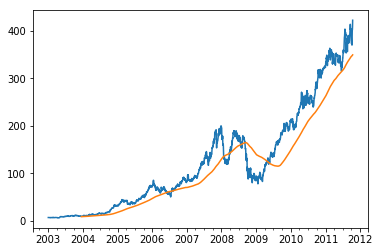

In [270]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

The **rolling(250)** is similar to ***groupby***(), but instead of grouping it creates an object that enables grouping over a 250-day sliding window. So here we have the 250-day moving window average of Apple's stock price.

In [271]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [272]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

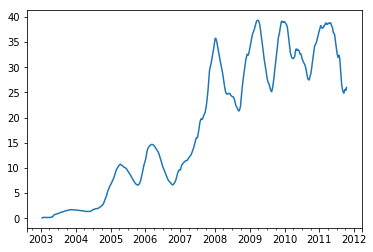

In [273]:
appl_std250.plot()

In order to compute an ***expanding window mean***, use the expanding operator instead of **rolling**. The expanding starts the time window from the begining of the time series and increases the size of the window until it encompasses the whole series.  
  
An expanding window mean on the *appl_std250* time series looks like this:

In [275]:
expanding_mean = appl_std250.expanding().mean()

Calling a moving window function on a DataFrame applies the transformation on each column:  

C:\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


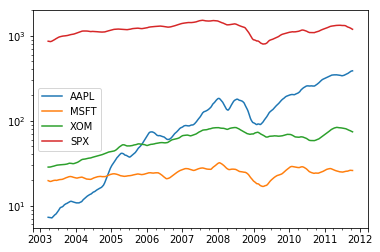

In [277]:
close_px.rolling(60).mean().plot(logy=True)

The rolling function also accepts a string indicating a fixed-size time offset rather than a set number of periods. Using this notation is useful for irregular time series. These are the same string that we can pass to $resample()$. For example, we could compute a 20-day rolling mean like this:

In [278]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.400000,21.110000,29.220000,909.030000
2003-01-03,7.425000,21.125000,29.230000,908.810000
2003-01-06,7.433333,21.256667,29.473333,915.543333
2003-01-07,7.432500,21.425000,29.342500,917.390000
2003-01-08,7.402000,21.402000,29.240000,915.898000
2003-01-09,7.391667,21.490000,29.273333,917.843333
2003-01-10,7.387143,21.558571,29.238571,919.232857
2003-01-13,7.378750,21.633750,29.197500,920.111250
2003-01-14,7.370000,21.717778,29.194444,921.394444
2003-01-15,7.355000,21.757000,29.152000,921.077000


#### Exponentially weighted Functions  
An alternative to using a static window size with equally weighted observations is tospecify a constant decay factor to give more weight to more recent observations.
There are a couple of ways to specify the decay factor. A popular one is using a span,which makes the result comparable to a simple moving window function with win‐
dow size equal to the span.  
  
pandas has the ***ewm***() operator to go along with ***rolling***() and ***expanding***() . Here’s an
example comparing a 60-day moving average of Apple’s stock price with an EW mov‐
ing average with span=60:

In [283]:
aaple_px = close_px.AAPL['2006':'2007']

In [284]:
ma60 = aaple_px.rolling(30, min_periods=20).mean()

In [285]:
ewm60 = aaple_px.ewm(span=30).mean()

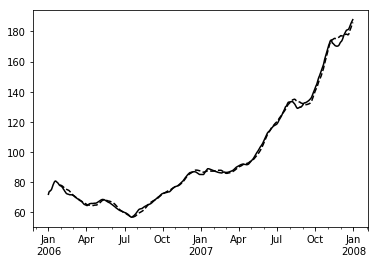

In [286]:
ma60.plot(style='k--', label='Simple MA')
ewm60.plot(style='k-', label='EW MA')

#### Binary Moving Window Functions  
Some statistical operators, like correlation and covariance, need to operate on two
time series. As an example, financial analysts are often interested in a stock’s correlation to a benchmark index like the S&P 500. To have a look at this, we first computethe percent change for all of our time series of interest:

In [287]:
spx_px = close_px_all['SPX']

In [288]:
spx_rets = spx_px.pct_change()

In [289]:
returns = close_px.pct_change()

The $corr()$ function after we call $rolling()$ can then compute the rolling correlation with *spx_rets*:

In [290]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

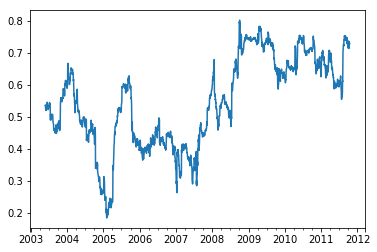

In [291]:
corr.plot()

Suppose we want to compute the correlation of the S&P 500 index with many stocks at once:

In [293]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

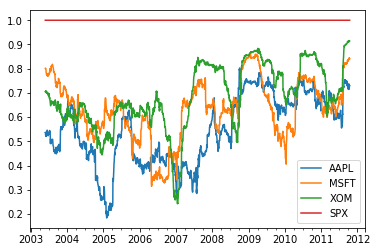

In [294]:
corr.plot()

#### User-Defined Moving Window Functions  
The $apply()$ method on rolling and related functions provides a means to apply an array function of our own devising over a moving window. **Ther only requirement is that the function produces a single value (a reduction) from each piece of the array**.  
  
For example, while we can compute sample quantile using $rolling(...).quantile(q)$, we might be interested in the percentile rank of a particular value over the sample. The $scipy.stats.percentileofscore$ function does just this:

In [296]:
from scipy.stats import percentileofscore

In [297]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)

In [298]:
res = returns.AAPL.rolling(250).apply(score_at_2percent)

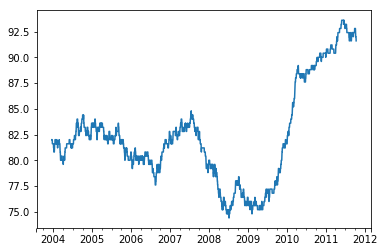

In [299]:
res.plot()

If you don't have $scipy$ installed, you can install it with conda or pip.

本章完结!